## Robust fitting of linear models using Least Absolute Deviations

https://en.wikipedia.org/wiki/Least_absolute_deviations

In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150
rcParams["text.usetex"] = True

In [2]:
import tensorflow as tf
import numpy as np

In [3]:
np.random.seed(123)

In [4]:
from lad import lad

Let's create some fake data and add outliers to them:

In [5]:
x = np.linspace(0, 10, 70)
noise = 10 * np.random.normal(size=len(x))
y = 10 * x + 10 + noise

In [6]:
mask = np.arange(len(x)) % 5 == 0
y[mask] = np.linspace(6, 3, len(y[mask])) * y[mask]

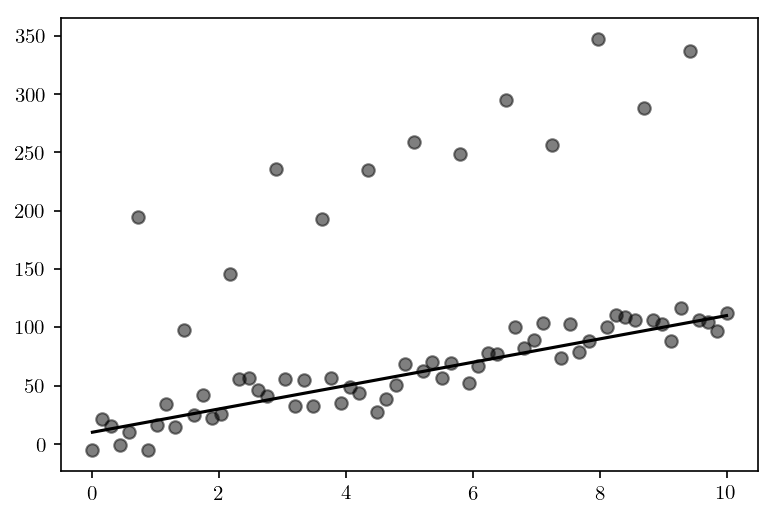

In [7]:
plt.plot(x, y, 'ok', alpha=.5)
plt.plot(x, 10 * x + 10, 'k')

In [8]:
X = np.vstack([x, np.ones(len(x))])

In [9]:
X.shape

(2, 70)

In [10]:
y.shape

(70,)

Let's compute the linear least squares model using ``tf.matrix_solve_ls``:

In [11]:
with tf.Session() as sess:
    X_tensor = tf.convert_to_tensor(X.T, dtype=tf.float64)
    y_tensor = tf.reshape(tf.convert_to_tensor(y, dtype=tf.float64), (-1, 1))
    coeffs = tf.matrix_solve_ls(X_tensor, y_tensor)

In [12]:
m, b = sess.run(coeffs)

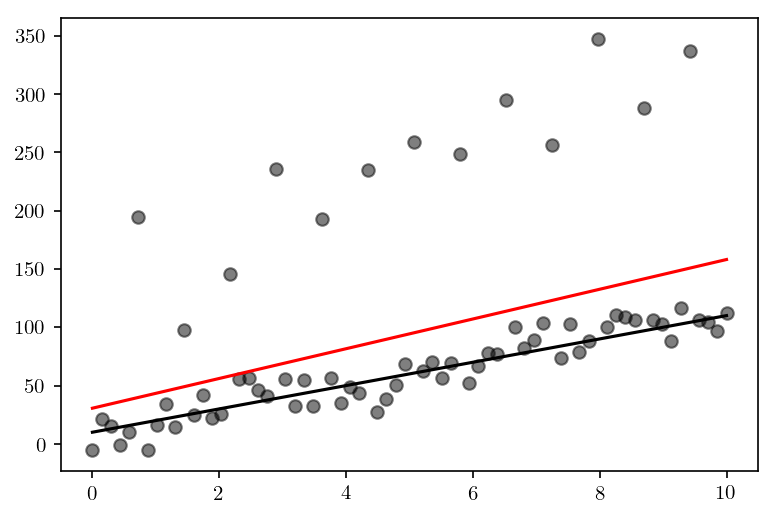

In [13]:
plt.plot(x, y, 'ok', alpha=.5)
plt.plot(x, 10 * x + 10, 'k')
plt.plot(x, m * x + b, 'r')

Now let's use the function ``lad`` from ``macaw`` to compute the linear model with the
least absolute deviations:

In [30]:
l1coeffs = lad(X.T, y, l1_regularizer=1., maxiter=100)

In [ ]:
m_l1, b_l1 = sess.run(l1coeffs)

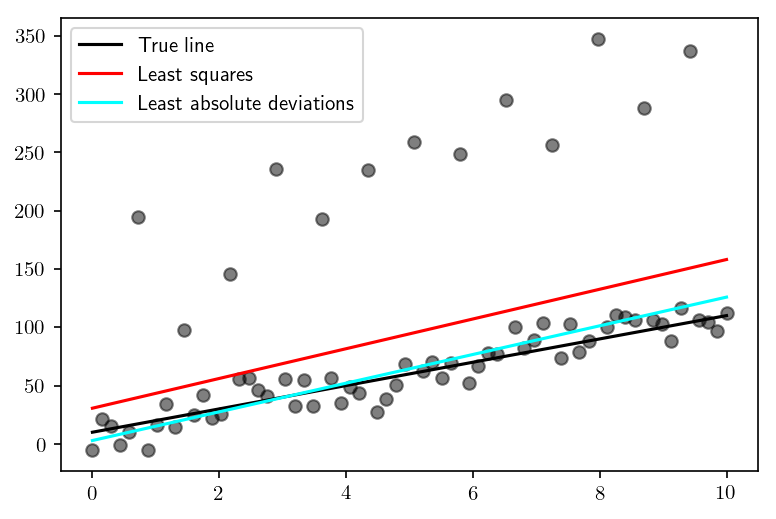

In [29]:
plt.plot(x, y, 'ok', alpha=.5)
plt.plot(x, 10 * x + 10, 'k', label="True line")
plt.plot(x, m * x + b, 'r', label="Least squares")
plt.plot(x, m_l1 * x + b_l1, 'cyan', label="Least absolute deviations")
plt.legend()